In [2]:
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import seaborn as sb
from moscot.problems.time import TemporalProblem
import scvelo

ModuleNotFoundError: No module named 'moscot'

In [ ]:
adata = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/larry_invitro/larry_invitro_adata_sub_raw.h5ad")
adata

In [ ]:
leave_out = [2]
new_adata = adata[~adata.obs['time_info'].isin(leave_out)].copy()
sc.pp.log1p(new_adata)

In [24]:
tp = TemporalProblem(new_adata)
tp = tp.prepare('time_info')
tp = tp.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse", proliferation_key="prolif")

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


In [25]:
sc.pp.pca(new_adata)
sc.pp.neighbors(new_adata)
sc.tl.umap(new_adata)

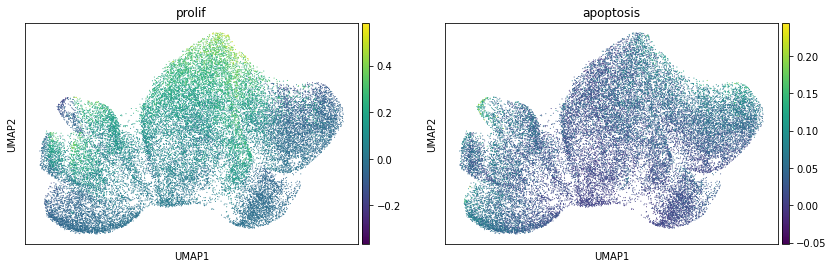

In [26]:
sc.pl.umap(new_adata[new_adata.obs["time_info"] == 6.0], color=['prolif', "apoptosis"])

In [27]:
new_adata.obs["growth_rate"] = np.exp(new_adata.obs["prolif"] - new_adata.obs["apoptosis"])
new_adata.obs["scaled_growth_rate"] = np.exp(2 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled3_growth_rate"] = np.exp(3 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled4_growth_rate"] = np.exp(4 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))

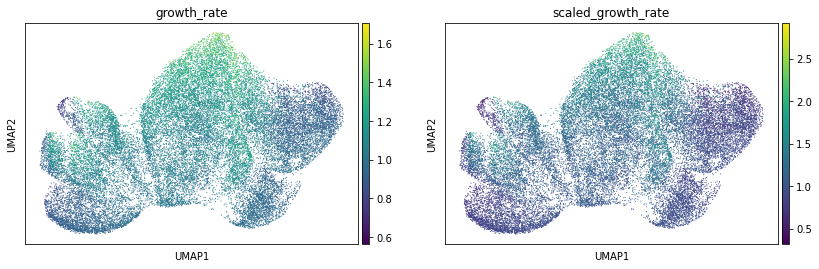

In [29]:
sc.pl.umap(new_adata[new_adata.obs["time_info"] == 6.0], color=["growth_rate", "scaled_growth_rate"])

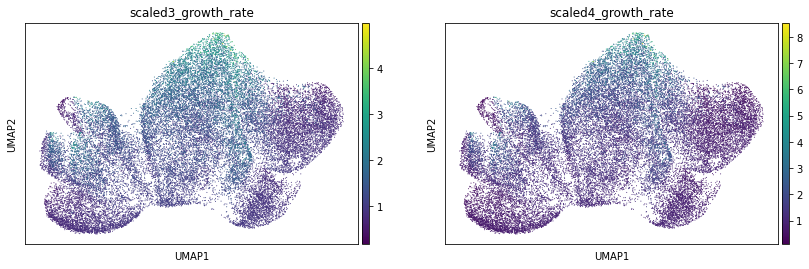

In [30]:
sc.pl.umap(new_adata[new_adata.obs["time_info"] == 6.0], color=["scaled3_growth_rate", "scaled4_growth_rate"])

In [31]:
sc.pp.highly_variable_genes(new_adata, n_top_genes=2000,)

In [32]:
time_infos = [4.0, 6.0]

In [34]:
episode_adata = new_adata[new_adata.obs["time_info"] == 4.0].copy()
episode_adata.write(f"/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/larry_invitro/stage_4_growth_rate.h5ad")
episode_adata = new_adata[new_adata.obs["time_info"] == 6.0].copy()
episode_adata.write(f"/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/larry_invitro/stage_6_growth_rate.h5ad")

In [ ]:
sc.pl.embedding(new_adata, basis='X_emb', color='state_info')